# (연구&교수님) EBT – ECG 자료 시각화

최규빈  
2024-07-30

In [112]:
library(devtools)
install_github("guebin/EBT",force=TRUE)
library(tidyverse)
library(ebt)
library(wavelets)
library(phonTools)
library(fields)
library(viridis)
library(wavScalogram)
library(magick)

── R CMD build ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpnL4DDZ/remotes920376f46111/guebin-EBT-f065664/DESCRIPTION’
─  preparing ‘ebt’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘ebt_0.1.0.tar.gz’
   


## A. signal

In [113]:
data(ecg)
f<-as.vector(ecg)
t<-seq(0,11.37,length=2048)
fs<-180 
maxtau=225
len<-length(f)
#ecg_mvmap <- mvmap(f,maxtau = maxtau)
#save(ecg_mvmap, file = "./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_mvmap_0730.RData")
load("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_mvmap_0730.RData")
v_map<-ecg_mvmap$vmap
temp<-spectrogram(f,fs=180,windowlength = 612.5,show=F)$spectrogram
spec_rslt <-spectrogram(f,fs=180,windowlength = 612.5,show=F)$spectrogram
scalo_rslt <- abs(cwt_wst(f,makefigure=FALSE)$coef)

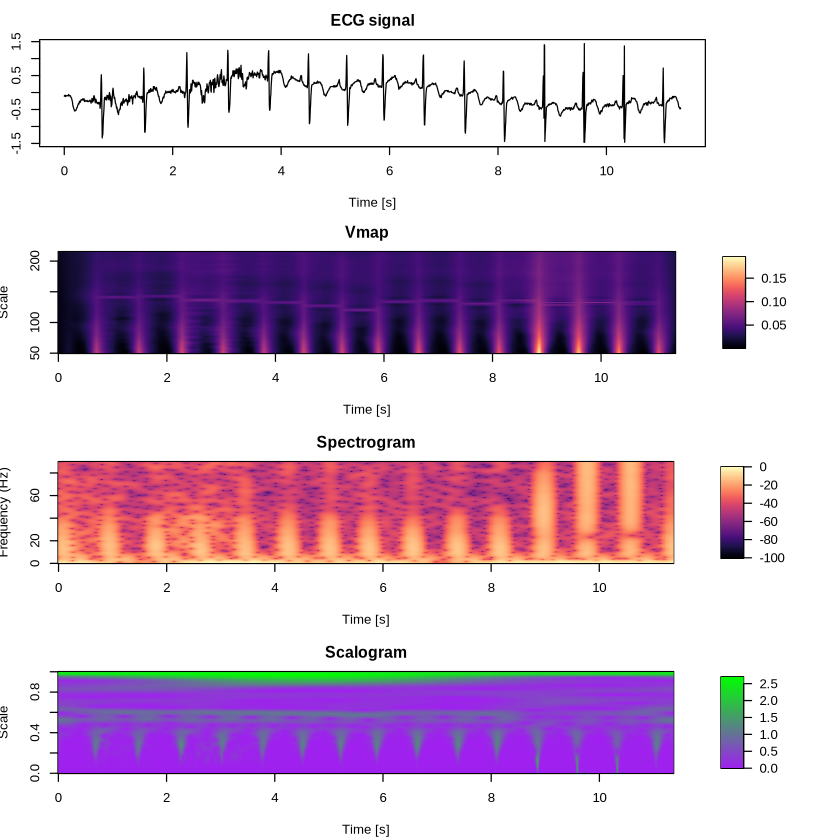

In [116]:
#pdf("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis.pdf",width=14,height=18)
par(mfrow=c(4,1))
par(mar=c(4,2.5,2.5,8.5))
plot(t,f, main = "ECG signal", xlab = "Time [s]", ylab = "Amplitude",type='l')
par(mar=c(4,3.5,2.5,2.5))
image.plot(
    x=t,y=50:215,z=v_map[1:length(f),50:215],
    xlab = "Time [s]", ylab = "Scale", main = "Vmap",
    legend.mar=5, 
    col=viridis(256, option = "magma")
)
par(mar=c(4,3.5,2.5,2.5))
image.plot(
    x=seq(0,11.37,length=941),y=seq(0,90,length=617),z=spec_rslt[1:941,1:617],
    xlab = "Time [s]", ylab = "Frequency (Hz)", main = "Spectrogram",
    col=viridis(256, option = "magma")
)
par(mar=c(4,3.5,2.5,2.5))
image.plot(
    x=t,z=scalo_rslt,
    xlab = "Time [s]", ylab = "Scale", main = "Scalogram",
    col = colorRampPalette(c("purple", "green"))(256)
)
par(mfrow=c(1,1))
#dev.off()

In [96]:
png("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis.png",width=2100,height=1800,res=300)
par(mfrow=c(4,1))
par(mar=c(4,4.5,2.5,8.5))
plot(t,f, main = "ECG signal", xlab = "Time [s]", ylab = "Amplitude",type='l')
par(mar=c(4,5.5,2.5,2.5))
image.plot(
    x=t,y=50:215,z=v_map[1:length(f),50:215],
    xlab = "Time [s]", ylab = "Scale", main = "Vmap",
    legend.mar=5, 
    col=viridis(256, option = "magma")
)
par(mar=c(4,5.5,2.5,2.5))
image.plot(
    x=seq(0,11.37,length=941),y=seq(0,90,length=617),z=spec_rslt[1:941,1:617],
    xlab = "Time [s]", ylab = "Frequency (Hz)", main = "Spectrogram",
    col=viridis(256, option = "magma")
)
par(mar=c(4,5.5,2.5,2.5))
image.plot(
    x=t,z=scalo_rslt,
    xlab = "Time [s]", ylab = "Scale", main = "Scalogram",
    col = colorRampPalette(c("purple", "green"))(256)
)
par(mfrow=c(1,1))
dev.off()

png: 2

In [106]:
library(phonTools)
library(fields)
library(viridis)
library(wavScalogram)

# Function to save plots as PNGs
save_plot <- function(filename, plot_func) {
  png(filename, width=1400, height=350, res=150)
  plot_func()
  dev.off()
}

# Define the plot functions
plot1 <- function() {
  par(mar=c(4,4.5,2.5,8.5))
  plot(t, f, main="ECG signal", xlab="Time [s]", ylab="Amplitude", type='l', cex.lab=1.5, cex.axis=1.5, cex.main=1.5)
}

plot2 <- function() {
  par(mar=c(4,5.5,2.5,2.5))
  image.plot(
    x=t, y=50:215, z=v_map[1:length(f), 50:215],
    xlab="Time [s]", ylab="Scale", main="Vmap",
    col=viridis(256, option="magma"), cex.lab=1.5, cex.axis=1.5, cex.main=1.5
  )
}

plot3 <- function() {
  par(mar=c(4,5.5,2.5,2.5))
  image.plot(
    x=seq(0, 11.37, length=941), y=seq(0, 90, length=617), z=spec_rslt[1:941, 1:617],
    xlab="Time [s]", ylab="Frequency (Hz)", main="Spectrogram",
    col=viridis(256, option="magma"), cex.lab=1.5, cex.axis=1.5, cex.main=1.5
  )
}

plot4 <- function() {
  par(mar=c(4,5.5,2.5,2.5))
  image.plot(
    x=t, z=scalo_rslt,
    xlab="Time [s]", ylab="Scale", main="Scalogram",
    col=colorRampPalette(c("purple", "green"))(256), cex.lab=1.5, cex.axis=1.5, cex.main=1.5
  )
}

# Save each plot as a high-resolution PNG
save_plot("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot1.png", plot1)
save_plot("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot2.png", plot2)
save_plot("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot3.png", plot3)
save_plot("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot4.png", plot4)
library(magick)

# Read the images
img1 <- image_read("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot1.png")
img2 <- image_read("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot2.png")
img3 <- image_read("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot3.png")
img4 <- image_read("./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis_plot4.png")

# Combine images into a single PDF
combined <- image_append(c(img1, img2, img3, img4), stack = TRUE)
image_write(combined, path = "./Dropbox/03_Yechan3/연구/교수님이랑/EBT/ecg_comparevis.pdf", format = "pdf")

png: 2

png: 2

png: 2

png: 2